<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Purpose-of-Project" data-toc-modified-id="Purpose-of-Project-0.0.1">Purpose of Project</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-0.0.2">Features</a></span></li><li><span><a href="#Things-to-Add" data-toc-modified-id="Things-to-Add-0.0.3">Things to Add</a></span></li><li><span><a href="#Known-Issues-with-Custom-Modules:" data-toc-modified-id="Known-Issues-with-Custom-Modules:-0.0.4">Known Issues with Custom Modules:</a></span></li></ul></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-0.1">Initialization</a></span></li><li><span><a href="#Unpack-SBML-model-into-SciPyModel-form" data-toc-modified-id="Unpack-SBML-model-into-SciPyModel-form-0.2">Unpack SBML model into SciPyModel form</a></span><ul class="toc-item"><li><span><a href="#Integrate-SciPyModel-Deterministically" data-toc-modified-id="Integrate-SciPyModel-Deterministically-0.2.1">Integrate SciPyModel Deterministically</a></span></li><li><span><a href="#Plot-Deterministic-Data" data-toc-modified-id="Plot-Deterministic-Data-0.2.2">Plot Deterministic Data</a></span></li><li><span><a href="#Sample-from-Nullspace" data-toc-modified-id="Sample-from-Nullspace-0.2.3">Sample from Nullspace</a></span></li></ul></li></ul></li></ul></div>

### Purpose of Project

The Systems Biology Markup Language (SBML) ecosystem has paved the way as a unified framework for the various models within the field of systems biology. A SBML model primarily consists of Species, Parameters, Reactions, Assignments, and Compartments. In general terms, these represent *state variables*, *equation parameters*, *differential equations*, *composite equations*, and *vessel volumes*, respectively. The SBML model is presented in a reaction-network schema which can be digested into a parameterized system of differential equations (ODEs).

As of this writing, there exist over 350 SBML compatible software packages. A vast majority of these packages are little more than simple integrators which provide basic insight into the behavior of the SBML model. Additionally, while these packages aim to inform researchers about specific characteristics of a SBML model, often the lack of clarity in documentation or code-availability leaves the package as a "one-trick-pony". 

The SBML-Sensitivity-Toolbox was conceived to provide a unified, extensible platform for sensitivity-based analysis of SBML models. Written entirely in Python, the SBML-Sensitivity-Toolbox primarily focuses on ODE models.

### Features
1. Conversion of SBML model to SciPy function declaration. Relevant SBML information is gathered into the variable object `SciPyModel`.
2. Full integration with Jupyter Notebook workflow.

### Things to Add
1. Support for assignments in SBML model.
2. GPU-based Monte Carlo methods.
3. GUI
4. Identify large, open data sets to suggest closing them.
5. Implement local sensitivity analysis.
6. Implement global sensitivity analysis.

### Known Issues with Custom Modules:
1. Unable to import model files from subdirectory.
2. Does not distinguish between kinetic and system parameters.
3. Assumes SBML model has one compartment with a volume of 1. e.g. Concentrations are divided by 1 to obtain amounts.

## Initialization

Create `SciPyModel` object. The `SciPyModel` object is used as a universal basis for the methods implemented within the SBML-Sensitivity-Toolbox.

In [1]:
from utils import SBML2SciPy
SciPyModel = SBML2SciPy.createSciPyModel()

## Unpack SBML model into SciPyModel form

* `importSBMLFile`: Constructs SciPyModel from SBML model file. File path may or may not be specified using the optional variable `Provided_FilePath`.
* `writeODEFunction`: Creates derivative function for use with the SciPy module `odeint`. 

In [2]:
SciPyModel = SBML2SciPy.importSBMLFile( SciPyModel )

In [3]:
SciPyModel = SBML2SciPy.writeODEFunction( SciPyModel )

### Integrate SciPyModel Deterministically

Specify time-vector information.

In [16]:
SciPyModel.SimulationData.TimeStart = 0
SciPyModel.SimulationData.TimeEnd = 30*24
SciPyModel.SimulationData.DataPoints = 30*24

In [66]:
import numpy

SteadyStateCondition = numpy.ones([SciPyModel.Species.Quantity,1])
# SteadyStateCondition[-2:] = numpy.zeros([2,1])

SciPyModel.Species.Value = SteadyStateCondition.flatten()

SciPyModel = SBML2SciPy.integrateODEFunction(SciPyModel)

ERROR: Unknown error. Unable to remove 0240PMApril182018.py


### Plot Deterministic Data

In [ ]:
# Import required packages
import numpy, matplotlib
from matplotlib import pyplot
import sys


if sys.version_info[0] < 3:
    import Tkinter as tk
else:
    import tkinter as tk

    
import matplotlib.backends.tkagg as tkagg
from matplotlib.backends.backend_agg import FigureCanvasAgg

def draw_figure( canvas, figure, loc=(0,0)):
    
    figure_canvas_agg = FigureCanvasAgg(figure)
    figure_canvas_agg.draw()
    figure_x, figure_y, figure_w, figure_h = figure.bbox.bounds
    photo = tk.PhotoImage(master=canvas, width=int(figure_w), height=int(figure_h))
    
    # Position: convert from top-left corner anchor to center anchor
    canvas.create_image(loc[0], loc[1], image=photo)
    
    # Unfortunately, there's no accessor for the pointer to the native renderer
    tkagg.blit(photo, figure_canvas_agg.get_renderer()._renderer, colormode=2)
    
    # Return a handle which contains a reference to the photo object
    # wich must be kept live or else the picture disappears
    return photo

# Create a canvas
w, h = 300, 200
window = tk.Tk()
window.title("A figure in a canvas")
canvas = tk.Canvas(window, width=w, height=h)
canvas.pack()

# Create the figure we desire to add to an existing canvas
fig = matplotlib.figure.Figure(figsize=(2,1))
ax = fig.add_axes([0,0,1,1])
ax.plot( SciPyModel.SimulationData.Deterministic.Data )

# Keep this handle alive, or else figure will disappear
fig_photo = draw_figure(canvas, fig, loc=(100,100))

# Let Tk take over
tk.mainloop()

### Sample from Nullspace

In [6]:
SciPyModel = SBML2SciPy.createNullSpaceFunction( SciPyModel )

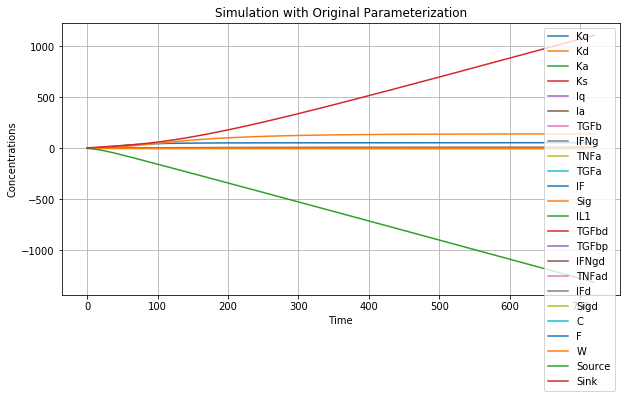

In [67]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
TVec = np.linspace(SciPyModel.SimulationData.TimeStart,
                   SciPyModel.SimulationData.TimeEnd,
                   SciPyModel.SimulationData.DataPoints)

plt.close()
plt.figure(figsize=(10, 5))

LineObjs = plt.plot(TVec, SciPyModel.SimulationData.Deterministic.Data)
plt.grid()

plt.title('Simulation with Original Parameterization')
plt.xlabel('Time')
plt.ylabel('Concentrations')

plt.legend(LineObjs, SciPyModel.Species.Names)

plt.show()

In [70]:
import itertools

NullSpace = SciPyModel.ToolboxFunctions.NullSpaceFunction(
    list(
        itertools.compress(SciPyModel.Parameters.Value,
                           np.invert(SciPyModel.Parameters.KineticFlag))),
    SciPyModel.Species.Value)

RandG = np.random.rand(NullSpace.shape[1], 1)

Sample = NullSpace.dot(RandG)

numpy.savetxt("NullSpaceTest.csv", NullSpace, delimiter=",")

In [50]:
print list(
        itertools.compress(SciPyModel.Parameters.Value,
                           np.invert(SciPyModel.Parameters.KineticFlag)))

print SciPyModel.Species.Value

[0.0001, 0.0017, 0.0738, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.]
